Nome: Rebecca Moreira Messias
RA: 186416
Turma Y

# Parte computacional

Instalações:

In [1]:
!pip install pandas
!pip install matplotlib
!pip install numpy
!pip install scipy

     |████████████████████████████████| 9.5 MB 4.4 MB/s eta 0:00:01
     |████████████████████████████████| 509 kB 44.2 MB/s eta 0:00:01
     |████████████████████████████████| 14.5 MB 45.2 MB/s eta 0:00:01
     |████████████████████████████████| 11.6 MB 4.5 MB/s eta 0:00:01    |████████████                    | 4.4 MB 4.5 MB/s eta 0:00:02
     |████████████████████████████████| 2.2 MB 43.9 MB/s eta 0:00:01
     |████████████████████████████████| 1.1 MB 53.6 MB/s eta 0:00:01
     |████████████████████████████████| 25.9 MB 3.0 kB/s eta 0:00:01


Importações:

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import lagrange

## Item a

Para esse item foi utilizado a função já pronta da biblioteca scipy que calcula o polinômio interpolado pelo método de Lagrange. As variáveis `xExample` e `yExample` são os valores tabelados de x e f(x) usados como exemplo apenas para não ocorrer erro ao rodar no Jupyter.

In [3]:
def metodoLagrange(x, y):
    return lagrange(x, y)

## Item b

In [4]:
def getDiferencasDivididas(x, y):
    n = np.shape(y)[0]
    piramide = np.zeros([n, n])
    piramide[::,0] = y
    for j in range(1,n):
        for i in range(n-j):
            piramide[i][j] = (piramide[i+1][j-1] - piramide[i][j-1]) / (x[i+j] - x[i])
    return piramide[0]

def metodoNewton(x, y):
    vetor_coeficiente = getDiferencasDivididas(x, y)
    polinomio_final = np.polynomial.Polynomial([0.])
    n = vetor_coeficiente.shape[0]
    for i in range(n):
        p = np.polynomial.Polynomial([1.])
        for j in range(i):
            p_temp = np.polynomial.Polynomial([-x[j], 1.])
            p = np.polymul(p, p_temp)
        p *= vetor_coeficiente[i]
        polinomio_final = np.polyadd(polinomio_final, p)

    p = np.flip(polinomio_final[0].coef, axis=0)
    return p

## Item c

Utilizaremos a segiunte tabela para o polinômio de 4º grau:

In [5]:
x1 = np.linspace(-1, 1, 5)
y1 = np.exp(-36*(x1**2))

mapping1 = map(lambda yy, ee : [yy, ee], x1, y1)
pd.DataFrame(mapping1, columns=['x','f(x)'])

,x,f(x)
0,-1.0,2.319523e-16
1,-0.5,1.234098e-04
2,0.0,1.000000e+00
3,0.5,1.234098e-04
4,1.0,2.319523e-16


In [6]:
x2 = np.linspace(-1, 1, 9)
y2 = np.exp(-36*(x2**2))

mapping2 = map(lambda yy, ee : [yy, ee], x2, y2)
pd.DataFrame(mapping2, columns=['x','f(x)'])

,x,f(x)
0,-1.00,2.319523e-16
1,-0.75,1.605228e-09
2,-0.50,1.234098e-04
3,-0.25,1.053992e-01
4,0.00,1.000000e+00
5,0.25,1.053992e-01
6,0.50,1.234098e-04
7,0.75,1.605228e-09
8,1.00,2.319523e-16


In [7]:
x3 = np.linspace(-1, 1, 17)
y3 = np.exp(-36*(x3**2))

mapping3 = map(lambda yy, ee : [yy, ee], x3, y3)
pd.DataFrame(mapping3, columns=['x','f(x)'])

,x,f(x)
0,-1.000,2.319523e-16
1,-0.875,1.070923e-12
2,-0.750,1.605228e-09
3,-0.625,7.811489e-07
4,-0.500,1.234098e-04
5,-0.375,6.329715e-03
6,-0.250,1.053992e-01
7,-0.125,5.697828e-01
8,0.000,1.000000e+00
9,0.125,5.697828e-01


Abaixo temos o polinômio de 4º grau encontrado pelo método de Lagrange:

In [8]:
print(metodoLagrange(x1, y1))

       4             3         2
3.999 x - 5.369e-20 x - 4.999 x - 6.906e-21 x + 1


Abaixo temos o polinômio de 4º grau encontrado pelo método de Newton:

In [9]:
print(metodoNewton(x1, y1))

[ 3.99934181  0.         -4.99934181  0.          1.        ]


Abaixo temos o polinômio de 8º grau encontrado pelo método de Lagrange:

In [10]:
print(metodoLagrange(x2, y2))

      8             7         6             5         4             3
94.6 x - 1.527e-14 x - 178.6 x - 5.038e-15 x + 103.1 x - 1.318e-14 x
          2
 - 20.08 x - 1.082e-15 x + 1


Abaixo temos o polinômio de 8º grau encontrado pelo método de Newton:

In [11]:
print(metodoNewton(x2, y2))

[ 9.46016675e+01  0.00000000e+00 -1.78574527e+02  1.42108547e-14
  1.03052812e+02  1.06581410e-14 -2.00799525e+01 -8.88178420e-16
  1.00000000e+00]


Abaixo temos o polinômio de 16º grau encontrado pelo método de Lagrange:

In [12]:
print(metodoLagrange(x3, y3))

           16             15             14             13
1.973e+04 x  + 5.736e-11 x  - 6.431e+04 x  - 2.763e-11 x 
              12             11             10             9
 + 8.367e+04 x  + 1.549e-09 x  - 5.617e+04 x  + 8.245e-10 x
              8             7        6             5         4
 + 2.109e+04 x - 2.141e-11 x - 4512 x - 8.469e-13 x + 543.1 x
              3         2
 - 1.502e-13 x - 34.99 x - 3.21e-15 x + 1


Abaixo temos o polinômio de 16º grau encontrado pelo método de Newton:

In [13]:
print(metodoNewton(x3, y3))

[ 1.97301491e+04  0.00000000e+00 -6.43139456e+04  0.00000000e+00
  8.36745006e+04 -7.27595761e-12 -5.61734113e+04 -3.63797881e-12
  2.10860723e+04 -2.72848411e-12 -4.51242273e+03 -3.97903932e-13
  5.43052186e+02  1.06581410e-14 -3.49945897e+01 -2.65065747e-15
  1.00000000e+00]


Comparando os polinômios resultantes pelo método de lagrange e pelo método de newton percebemos que eles são diferentes.

### Gráficos do polinômio de 4º grau

Segue as tabelas para plotagem dos gráficos.

In [14]:
map1 = map(lambda yy, ee : [yy, ee], x1, y1)
pd.DataFrame(map1, columns=['x','f(x)'])

,x,f(x)
0,-1.0,2.319523e-16
1,-0.5,1.234098e-04
2,0.0,1.000000e+00
3,0.5,1.234098e-04
4,1.0,2.319523e-16


In [15]:
eixoY1Lagrange = np.polyval(metodoLagrange(x1, y1), x1)
mapLagrange1 = map(lambda yy, ee : [yy, ee], x1, eixoY1Lagrange)
pd.DataFrame(mapLagrange1, columns=['x','f(x) por Lagrange'])

,x,f(x) por Lagrange
0,-1.0,-4.440892e-16
1,-0.5,1.234098e-04
2,0.0,1.000000e+00
3,0.5,1.234098e-04
4,1.0,-4.440892e-16


In [16]:
eixoY1Newton = np.polyval(metodoNewton(x1, y1), x1)
mapNewton1 = map(lambda yy, ee : [yy, ee], x1, eixoY1Newton)
pd.DataFrame(mapNewton1, columns=['x','f(x) por Newton'])

,x,f(x) por Newton
0,-1.0,0.000000
1,-0.5,0.000123
2,0.0,1.000000
3,0.5,0.000123
4,1.0,0.000000


Abaixo plotamos o gráfico da função dada em azul, do polinômio de Lagrange em vermelho e do polinômio de Newton em verde para o grau 4. Os valores ficaram muito próximos ao da função real, por esse motivo optei por mostrar em linha cheia a função original e em pontilhado os polinômios (mesmo assim é bem difícil de diferenciar o polinômio de Newton e de Lagrange).

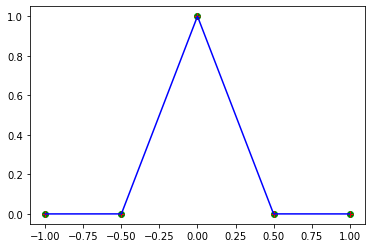

In [17]:
plt.plot(x1, eixoY1Newton, 'o',color= "green")
plt.plot(x1, eixoY1Lagrange, '+', color= "red")
plt.plot(x1, y1, color="blue")

plt.show()

### Gráficos do polinômio de 8º grau

Segue as tabelas para plotagem dos gráficos.

In [18]:
map2 = map(lambda yy, ee : [yy, ee], x2, y2)
pd.DataFrame(map2, columns=['x','f(x)'])

,x,f(x)
0,-1.00,2.319523e-16
1,-0.75,1.605228e-09
2,-0.50,1.234098e-04
3,-0.25,1.053992e-01
4,0.00,1.000000e+00
5,0.25,1.053992e-01
6,0.50,1.234098e-04
7,0.75,1.605228e-09
8,1.00,2.319523e-16


In [19]:
eixoY2Lagrange = np.polyval(metodoLagrange(x2, y2), x2)
mapLagrange2 = map(lambda yy, ee : [yy, ee], x2, eixoY2Lagrange)
pd.DataFrame(mapLagrange2, columns=['x','f(x) por Lagrange'])

,x,f(x) por Lagrange
0,-1.00,5.795364e-14
1,-0.75,1.605240e-09
2,-0.50,1.234098e-04
3,-0.25,1.053992e-01
4,0.00,1.000000e+00
5,0.25,1.053992e-01
6,0.50,1.234098e-04
7,0.75,1.605227e-09
8,1.00,-1.110223e-15


In [20]:
eixoY2Newton = np.polyval(metodoNewton(x2, y2), x2)
mapNewton2 = map(lambda yy, ee : [yy, ee], x2, eixoY2Newton)
pd.DataFrame(mapNewton2, columns=['x','f(x) por Newton'])

,x,f(x) por Newton
0,-1.00,-3.108624e-14
1,-0.75,1.605222e-09
2,-0.50,1.234098e-04
3,-0.25,1.053992e-01
4,0.00,1.000000e+00
5,0.25,1.053992e-01
6,0.50,1.234098e-04
7,0.75,1.605235e-09
8,1.00,1.687539e-14


Abaixo plotamos o gráfico da função dada em azul, do polinômio de Lagrange em vermelho e do polinômio de Newton em verde para o grau 8. Os valores ficaram muito próximos ao da função real, por esse motivo optei por mostrar em linha cheia a função original e em pontilhado os polinômios (mesmo assim é bem difícil de diferenciar o polinômio de Newton e de Lagrange).

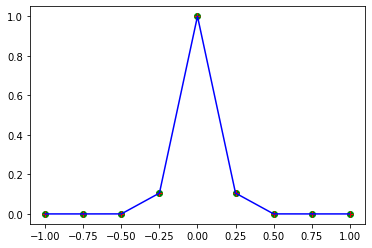

In [21]:
plt.plot(x2, eixoY2Newton, 'o',color= "green")
plt.plot(x2, eixoY2Lagrange, '+', color= "red")
plt.plot(x2, y2, color="blue")

plt.show()

### Gráficos do polinômio de 16º grau

Segue as tabelas para plotagem dos gráficos.

In [22]:
map3 = map(lambda yy, ee : [yy, ee], x3, y3)
pd.DataFrame(map3, columns=['x','f(x)'])

,x,f(x)
0,-1.000,2.319523e-16
1,-0.875,1.070923e-12
2,-0.750,1.605228e-09
3,-0.625,7.811489e-07
4,-0.500,1.234098e-04
5,-0.375,6.329715e-03
6,-0.250,1.053992e-01
7,-0.125,5.697828e-01
8,0.000,1.000000e+00
9,0.125,5.697828e-01


In [23]:
eixoY3Lagrange = np.polyval(metodoLagrange(x3, y3), x3)
mapLagrange3 = map(lambda yy, ee : [yy, ee], x3, eixoY3Lagrange)
pd.DataFrame(mapLagrange3, columns=['x','f(x) por Lagrange'])

,x,f(x) por Lagrange
0,-1.000,-4.685195e-09
1,-0.875,-1.177893e-09
2,-0.750,1.359219e-09
3,-0.625,7.811093e-07
4,-0.500,1.234098e-04
5,-0.375,6.329715e-03
6,-0.250,1.053992e-01
7,-0.125,5.697828e-01
8,0.000,1.000000e+00
9,0.125,5.697828e-01


In [24]:
eixoY3Newton = np.polyval(metodoNewton(x3, y3), x3)
mapNewton3 = map(lambda yy, ee : [yy, ee], x3, eixoY3Newton)
pd.DataFrame(mapNewton3, columns=['x','f(x) por Newton'])

,x,f(x) por Newton
0,-1.000,-7.863377e-12
1,-0.875,-1.484257e-12
2,-0.750,1.605225e-09
3,-0.625,7.811490e-07
4,-0.500,1.234098e-04
5,-0.375,6.329715e-03
6,-0.250,1.053992e-01
7,-0.125,5.697828e-01
8,0.000,1.000000e+00
9,0.125,5.697828e-01


Abaixo plotamos o gráfico da função dada em azul, do polinômio de Lagrange em vermelho e do polinômio de Newton em verde para o grau 16. Os valores ficaram muito próximos ao da função real, por esse motivo optei por mostrar em linha cheia a função original e em pontilhado os polinômios (mesmo assim é bem difícil de diferenciar o polinômio de Newton e de Lagrange).

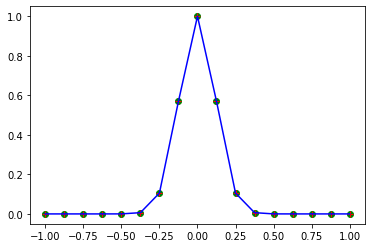

In [25]:
plt.plot(x3, eixoY3Newton, 'o',color= "green")
plt.plot(x3, eixoY3Lagrange, '+', color= "red")
plt.plot(x3, y3, color="blue")

plt.show()

### Análise dos gráficos

Apesar de não ser possível visualizar nessas plotações, o que ocorre é que nas bordas o erro aumenta entre a função original e o polinômio encontrado (e quanto maior o grau do polinômio, maior é esse erro). Esse fenômeno é chamado de Fenômeno de Runge.